# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities_Ali.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=469132e4e1d8c3d0dc5bbc4811b54530&units=metric&q='

In [4]:
# set up lists to hold reponse info
lats = []
longs = []
temps = []
winds = []
pressures = []
humiditys = []
countries = []
dates = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city)
    
    if response.status_code == 200:    
        data = response.json()
        
        try:
            
            lat = data['coord']['lat']
            lng = data['coord']['lon']
            temp = data['main']['temp']
            pressure = data['main']['pressure']
            humid = data['main']['humidity']
            wind = data['wind']['speed']
            country = data["sys"]["country"]
            date = data["dt"]
            
            
            lats.append(lat)
            longs.append(lng)
            temps.append(temp)
            pressures.append(pressure)
            humiditys.append(humid)
            winds.append(wind)
            countries.append(country)
            dates.append(date)
            
        except: 
            lats.append(np.nan)
            longs.append(np.nan)
            temps.append(np.nan)
            winds.append(np.nan)
            pressures.append(np.nan)
            humiditys.append(np.nan)
            countries.append("")
            dates.append(np.nan)
    else:
        lats.append(np.nan)
        longs.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        pressures.append(np.nan)
        humiditys.append(np.nan)
        countries.append("")
        dates.append(np.nan)
    
    # avoid rate limits
    print(city)
    time.sleep(1)

ribeira grande
jamestown
oistins
ushuaia
arraial do cabo
vila velha
salalah
kieta
bambous virieux
bronderslev
harindanga
rocha
rikitea
bredasdorp
asau
morondava
khonuu
ponta delgada
ponta do sol
blantyre
nabire
beringovskiy
cape town
hobart
flinders
afsin
mata
thompson
noumea
vadso
mahebourg
souillac
lorengau
mataura
aksu
tangshan
nuuk
naze
qaanaaq
clyde river
kontagora
hilo
sibolga
punta arenas
meyungs
bengkulu
hualmay
ust-nera
faruka
nikolskoye
ginir
sibu
xiamen
severo-kurilsk
jatai
fortuna
nadym
torbay
hermanus
el ejido
longyearbyen
albany
banyo
sikasso
kirakira
trincomalee
manaure
leningradskiy
puerto ayora
georgetown
dikson
vardo
paradwip
victoria
mar del plata
hasaki
sur
castro
vila franca do campo
roros
saldanha
illapel
kapaa
mys shmidta
esperance
vaini
moindou
fenoarivo
sept-iles
bluff
temir
mayumba
kaitangata
sao joao da barra
hithadhoo
yellowknife
maidstone
faya
nisia floresta
bandarbeyla
chuy
sao felix do xingu
yeppoon
pevek
victor harbor
kodiak
illoqqortoormiut
half moon ba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
 weather_data = pd.DataFrame()

weather_data["City"] = cities
weather_data["Country"] = countries
weather_data["Latitude"] = lats
weather_data["Longitude"] = longs
weather_data["Temp"] = temps
weather_data["Wind"] = winds
weather_data["Pressure"] = pressures
weather_data["Humidity"] = humiditys
weather_data["Date"] = dates

weather_data

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,ribeira grande,PT,38.5167,-28.7000,20.22,14.92,1002.0,83.0,1.637591e+09
1,jamestown,US,42.0970,-79.2353,-0.76,1.79,1013.0,82.0,1.637591e+09
2,oistins,BB,13.0667,-59.5333,29.05,8.23,1013.0,70.0,1.637591e+09
3,ushuaia,AR,-54.8000,-68.3000,0.81,10.29,1004.0,93.0,1.637591e+09
4,arraial do cabo,BR,-22.9661,-42.0278,24.92,5.14,1015.0,50.0,1.637591e+09
...,...,...,...,...,...,...,...,...,...
622,touba,CI,8.2833,-7.6833,33.11,2.12,1008.0,26.0,1.637592e+09
623,kambove,CD,-10.8764,26.5969,20.56,2.38,1009.0,86.0,1.637592e+09
624,hassleholm,SE,56.1591,13.7664,1.99,2.30,1021.0,68.0,1.637592e+09
625,ketchikan,US,55.3422,-131.6461,8.99,4.86,985.0,94.0,1.637592e+09


In [6]:
 weather_data.to_csv('cities_Ali.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
mask = weather_data.Humidity > 100
weather_data.loc[mask]

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

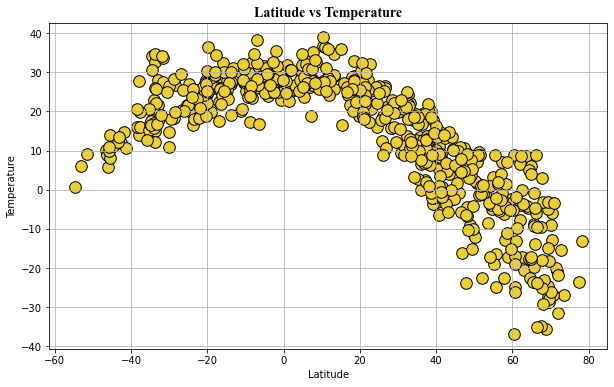

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Temp, color="#ebcf34", edgecolor="black", s=135)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()
plt.savefig('Latitude vs Temperature.png')

#### The closer the city(latitude) is to 0, the higher the temperature. Linear regression relationship is present.

## Latitude vs. Humidity Plot

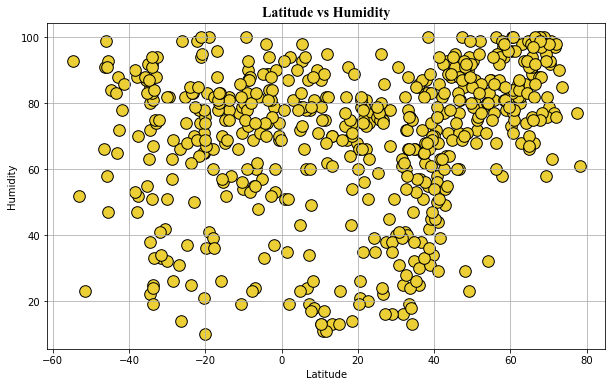

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Humidity, color="#ebcf34", edgecolor="black", s=135)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()
plt.savefig('Latitude vs Humidity.png')

#### No linear regression relationship.

## Latitude vs. Cloudiness Plot

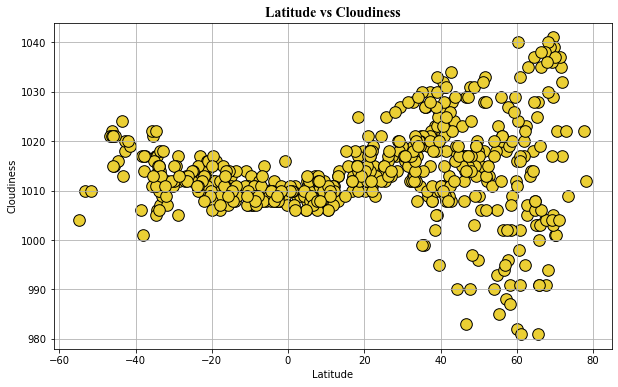

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Pressure, color="#ebcf34", edgecolor="black", s=135)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()
plt.savefig('Latitude vs Cloudiness.png')

#### No linear regression relationship.

## Latitude vs. Wind Speed Plot

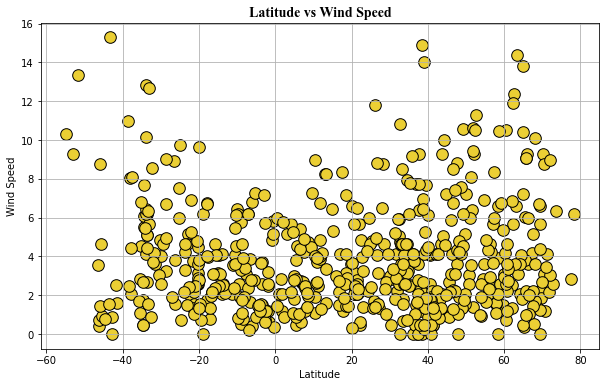

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Wind, color="#ebcf34", edgecolor="black", s=135)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()
plt.savefig('Latitude vs Wind Speed.png')

## Linear Regression

In [14]:
north_df = weather_data.loc[weather_data.Latitude >=0].reset_index(drop=True)
south_df = weather_data.loc[weather_data.Latitude <=0].reset_index(drop=True)

In [15]:
north_df.head()

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,ribeira grande,PT,38.5167,-28.7000,20.22,14.92,1002.0,83.0,1.637591e+09
1,jamestown,US,42.0970,-79.2353,-0.76,1.79,1013.0,82.0,1.637591e+09
2,oistins,BB,13.0667,-59.5333,29.05,8.23,1013.0,70.0,1.637591e+09
3,salalah,OM,17.0151,54.0924,27.05,4.12,1013.0,69.0,1.637591e+09
4,bronderslev,DK,57.2702,9.9410,7.01,8.36,1018.0,86.0,1.637591e+09


In [16]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       388 non-null    object 
 1   Country    388 non-null    object 
 2   Latitude   388 non-null    float64
 3   Longitude  388 non-null    float64
 4   Temp       388 non-null    float64
 5   Wind       388 non-null    float64
 6   Pressure   388 non-null    float64
 7   Humidity   388 non-null    float64
 8   Date       388 non-null    float64
dtypes: float64(7), object(2)
memory usage: 27.4+ KB


In [17]:
south_df.head()

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,ushuaia,AR,-54.8000,-68.3000,0.81,10.29,1004.0,93.0,1.637591e+09
1,arraial do cabo,BR,-22.9661,-42.0278,24.92,5.14,1015.0,50.0,1.637591e+09
2,vila velha,BR,-20.3297,-40.2925,23.86,3.13,1016.0,71.0,1.637591e+09
3,kieta,PG,-6.2167,155.6333,26.09,0.41,1009.0,82.0,1.637591e+09
4,bambous virieux,MU,-20.3428,57.7575,27.14,2.57,1015.0,65.0,1.637591e+09


In [18]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       191 non-null    object 
 1   Country    191 non-null    object 
 2   Latitude   191 non-null    float64
 3   Longitude  191 non-null    float64
 4   Temp       191 non-null    float64
 5   Wind       191 non-null    float64
 6   Pressure   191 non-null    float64
 7   Humidity   191 non-null    float64
 8   Date       191 non-null    float64
dtypes: float64(7), object(2)
memory usage: 13.6+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

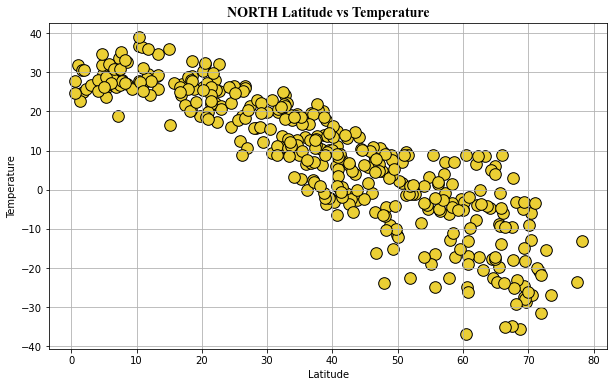

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(north_df.Latitude, north_df.Temp, color="#ebcf34", edgecolor="black", s=135)
plt.title("NORTH Latitude vs Temperature", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()
plt.savefig('NORTH Latitude vs Temperature.png')

#### The further away the latitude is from 0 the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

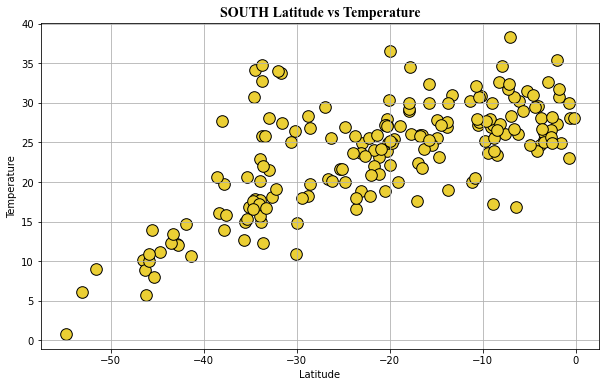

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(south_df.Latitude, south_df.Temp, color="#ebcf34", edgecolor="black", s=135)
plt.title("SOUTH Latitude vs Temperature", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()
plt.savefig('SOUTH Latitude vs Temperature.png')

#### The closer the latitude is to 0 the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

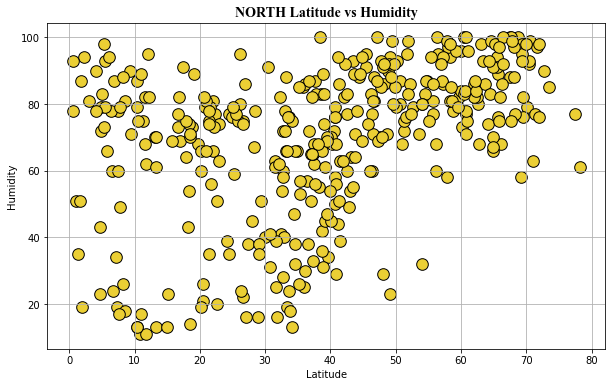

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(north_df.Latitude, north_df.Humidity, color="#ebcf34", edgecolor="black", s=135)
plt.title("NORTH Latitude vs Humidity", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()
plt.savefig('NORTH Latitude vs Humidity.png')

#### No relation with the humidity and the northern latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

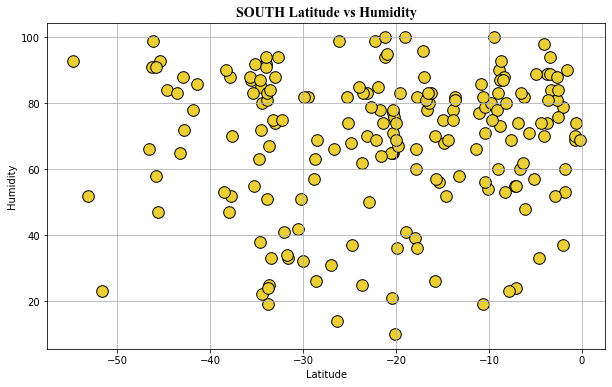

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(south_df.Latitude, south_df.Humidity, color="#ebcf34", edgecolor="black", s=135)
plt.title("SOUTH Latitude vs Humidity", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()
plt.savefig('SOUTH Latitude vs Humidity.png')

#### No relation with the humidity and the southern latitude. There are a couple of outliers.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

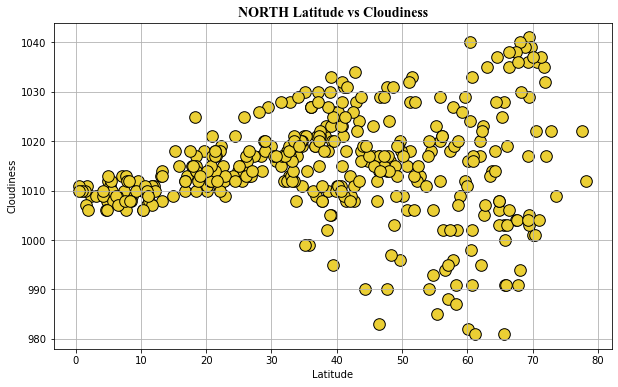

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(north_df.Latitude, north_df.Pressure, color="#ebcf34", edgecolor="black", s=135)
plt.title("NORTH Latitude vs Cloudiness", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()
plt.savefig('NORTH Latitude vs Cloudiness.png')

#### No relation with the cloudiness and the northern latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

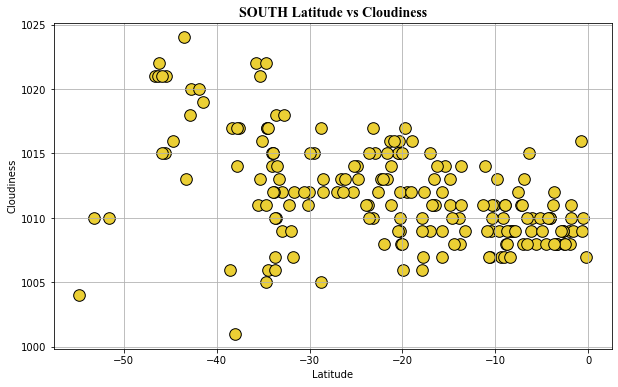

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(south_df.Latitude, south_df.Pressure, color="#ebcf34", edgecolor="black", s=135)
plt.title("SOUTH Latitude vs Cloudiness", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()
plt.savefig('SOUTH Latitude vs Cloudiness.png')

#### No relation with the humidity and the southern latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

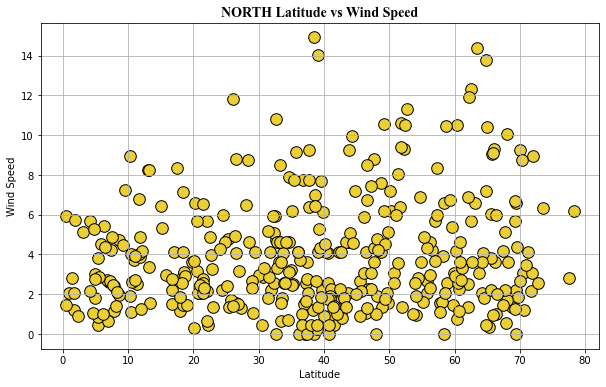

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(north_df.Latitude, north_df.Wind, color="#ebcf34", edgecolor="black", s=135)
plt.title("NORTH Latitude vs Wind Speed", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()
plt.savefig('NORTH Latitude vs Wind Speed.png')

#### No relation with the wind speed and the northern latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

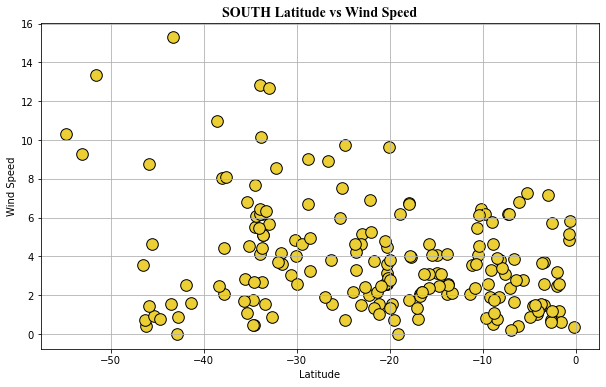

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(south_df.Latitude, south_df.Wind, color="#ebcf34", edgecolor="black", s=135)
plt.title("SOUTH Latitude vs Wind Speed", fontweight="bold", fontsize=14, fontname="Times New Roman")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()
plt.savefig('SOUTH Latitude vs Wind Speed.png')

#### No relation with the wind speed and the southern latitude. 